<a href="https://colab.research.google.com/github/eaedk/Iris-Classification-from-Data-to-Web-App/blob/main/Iris_classification_ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Installation

In [ ]:
!yes | pip  -q uninstall pandas-profiling
!pip -q install imblearn catboost pandas-profiling[notebook,html]

     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 315 kB 59.5 MB/s 
     |████████████████████████████████| 690 kB 55.9 MB/s 
     |████████████████████████████████| 9.9 MB 60.1 MB/s 
     |████████████████████████████████| 102 kB 45.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 4.7 MB 47.0 MB/s 
     |████████████████████████████████| 296 kB 57.3 MB/s 
     |████████████████████████████████| 1.6 MB 64.2 MB/s 


## Importation

In [ ]:
# Data handling
import pandas as pd

# Dataset
from sklearn import datasets

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
...

# EDA (pandas-profiling, etc. )
import pandas_profiling
from pandas_profiling import ProfileReport

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.ensemble import RandomForestClassifier

# Models' Evaluation
## Classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle


# Data Loading

In [ ]:
# import some data to play with
iris = datasets.load_iris(return_X_y=False, as_frame=True)

In [ ]:
iris['data']

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
iris['frame']

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = iris['frame']

# Exploratory Data Analysis: EDA

In [ ]:
#pandas profiling
profile = ProfileReport(df, title="Dataset", html={'style': {'full_width': True}})

In [70]:
profile.to_widgets() # on github have a look at the end tp see a complete report

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:426: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [ ]:
profile.to_file("Pandas-Profiling_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering

## Handle Duplicated Rows

In [ ]:
df.shape[0]

150

In [ ]:
df.drop_duplicates(inplace=True, keep='first')

In [ ]:
df.shape[0]

149

## Impute Missing Values

## New Features Creation

## Features Encoding




In [ ]:
# encoder = OneHotEncoder(drop='first', sparse=False).fit( pd.concat([df_train.iloc[:,:-1] , df_test]) )

## Dataset Splitting

In [ ]:
X, y = df.iloc[:,:-1], df.iloc[:,-1].values

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
(X_train.shape, y_train.shape), (X_eval.shape, y_eval.shape)

(((119, 4), (119,)), ((30, 4), (30,)))

## Features Scaling


In [ ]:
scaler = StandardScaler()

X_train_scaled, X_eval_scaled = scaler.fit_transform(X_train,), scaler.transform(X_eval,)

In [ ]:
(X_train_scaled.shape, y_train.shape), (X_eval_scaled.shape, y_eval.shape)

(((119, 4), (119,)), ((30, 4), (30,)))

## Optional: Train Dataset Balancing 

# Machine Learning 

In [ ]:
ml_model = RandomForestClassifier(n_estimators=10, random_state=1)
ml_model = ml_model.fit(X_train_scaled, y_train)

In [ ]:
y_eval_pred = ml_model.predict(X_eval_scaled)

In [ ]:
print(classification_report(y_eval, y_eval_pred, target_names=iris['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



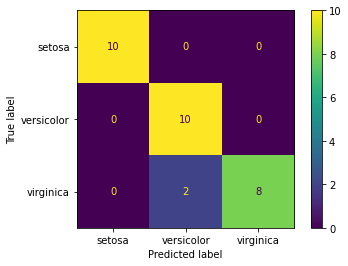

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_eval, y_eval_pred, display_labels=iris['target_names']) 

# Export 

## Save requirements

In [ ]:
requirements = '\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None))

with open('requirements.txt', 'w') as f:
    f.write(requirements)


## Object to export

In [ ]:
to_export = {
    "encoder": None,
    "scaler": scaler,
    "model": ml_model,
    "pipeline": None,
}

## Exportation

In [ ]:
with open('ML_items', 'wb') as file:
    pickle.dump(to_export, file)

## Loading after Exportation

In [ ]:
with open('ML_items', 'rb') as file:
    loaded_object = pickle.load(file)

In [ ]:
loaded_object

{'encoder': None,
 'scaler': StandardScaler(),
 'model': RandomForestClassifier(n_estimators=10, random_state=1),
 'pipeline': None}

# Pandas-Profiling Report


In [71]:
profile.to_notebook_iframe()